### Question 5 [10 points]

This document is to reproduce the Figure 2(a) in Gentemann, Chelle L., Fewings, Melanie R. and García‐Reyes, Marisol. "[Satellite sea surface temperatures along the West Coast of the United States during the 2014–2016 northeast Pacific marine heat wave.](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2016GL071039)" _Geophysical Research Letters_ 44, no. 1 (2017): 312-319. [DOI: 10.1002/2016GL071039](https://doi.org/10.1002/2016GL071039).


In [37]:
import matplotlib.pyplot as plt

from pathlib import Path

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import xarray as xr

xr.set_options(display_style="html")  # display dataset nicely

import warnings

warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

In [38]:

# Load data
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

# Select data by date range and take moving average by 5 days
sst_0212 = ds.sel(time=slice('2002-01-01', '2012-12-31')).analysed_sst
sst_0212_5_day_avg = sst_0212.rolling(time=5, center=True, min_periods=1).mean()

sst_0216 = ds.sel(time=slice('2002-01-01', '2016-07-31')).analysed_sst
sst_0216_5_day_avg = sst_0216.rolling(time=5, center=True, min_periods=1).mean()

# Calculate the climatology of each day of year using data during 2002 - July 2012 after 5 days average
climatology = sst_0212_5_day_avg.groupby('time.dayofyear').mean('time', keep_attrs=True, skipna=False)

# Pick the maximum 5 day average SST anomaly at each location for the visualization of Fig2(a)
sst_max_anomolies = (sst_0216_5_day_avg.groupby('time.dayofyear') - climatology).max(dim='time')

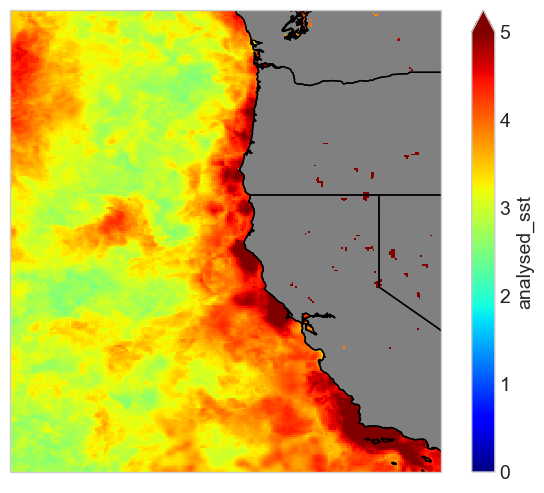

In [39]:
# Visualization
ax = plt.subplot(projection=crs)
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))
ax.coastlines("10m", color="k")
sst_max_anomolies.plot(ax=ax, transform=crs, cmap='jet', vmin=0, vmax=5)

It worth to note that the provided data for this homework has different longitude range (132W-), with original date used in the paper(138W-), which explains the cropped fraction of the figure left boundary.